In [501]:
#unzipper file
from zipfile import ZipFile

with ZipFile('titanic.zip','r') as zip_object:
    zip_object.extractall()

In [502]:
#Prepocessing data

#One-hot encoding is a method of converting categorical variables into a format that can be provided to machine learning algorithms to improve prediction. It involves creating new binary columns for each unique category in a feature.

#Applies transformers to columns of an array or pandas DataFrame. This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer #for missing values


In [503]:
#load and split dataset

data = pd.read_csv('train.csv')

#drop irrevelant columns
data = data.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

#separate features and target
X = data.drop("Survived", axis=1)
y = data["Survived"]

#print data
#print(X.shape)
print(X[:10])
#print(y.shape)
#print(y[:10])

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S
5       3    male   NaN      0      0   8.4583        Q
6       1    male  54.0      0      0  51.8625        S
7       3    male   2.0      3      1  21.0750        S
8       3  female  27.0      0      2  11.1333        S
9       2  female  14.0      1      0  30.0708        C


In [504]:
#plit data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.5, random_state=42)

#print shape of X_train
print(X_train.shape, X_valid.shape)

(445, 7) (446, 7)


In [505]:
#Define categorical and numerical columns

#Identify column types
numeric_features = ["Age","SibSp","Parch","Fare"]
categorical_features = ["Pclass","Sex","Embarked"]

#Numeric PiperLine: fill missing with meadian + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

#Categorical Piperline: fill missing with most_frequent + one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

#Combine both piperlines
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


        

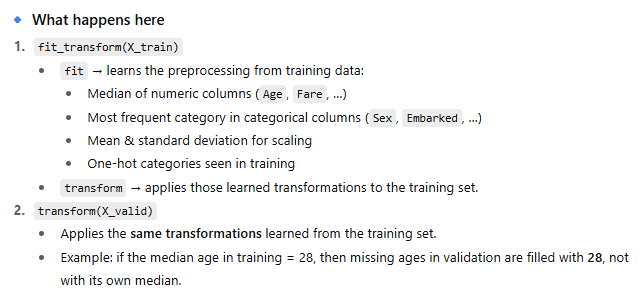

In [506]:
#transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)

#print shape of processed data
print(X_train_processed.shape, X_valid_processed.shape)

(445, 12) (446, 12)


In [507]:
#print preprocessed train data
#print(X_train_processed[:10])

In [508]:
#print table with each columns named

#numberics names
num_features_out = numeric_features

#categorical names from one-hot encoder
cat_features_out = preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features)

#combine them
all_features = list(num_features_out) + list(cat_features_out)


#====Convert preprocessed arrays to DataFrames====


#Train set
X_train_dense = X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed
X_train_df = pd.DataFrame(X_train_dense, columns=all_features)

#Validation set
X_valid_dense = X_valid_processed.toarray() if hasattr(X_valid_processed, "toarray") else X_valid_processed
X_valid_df = pd.DataFrame(X_valid_dense, columns=all_features)


#====Print results ===
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set display width to avoid line breaks
print(X_train_df[:10])


        Age     SibSp     Parch      Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0  1.172762  0.302883 -0.457604 -0.127256       0.0       1.0       0.0         0.0       1.0         0.0         0.0         1.0
1 -0.451384  1.843261  2.120039  4.052062       1.0       0.0       0.0         1.0       0.0         0.0         0.0         1.0
2 -0.838085 -0.467306 -0.457604 -0.382952       0.0       1.0       0.0         0.0       1.0         0.0         0.0         1.0
3  0.012658  0.302883 -0.457604 -0.215427       0.0       1.0       0.0         0.0       1.0         0.0         0.0         1.0
4 -1.302127  0.302883 -0.457604 -0.387507       0.0       0.0       1.0         0.0       1.0         1.0         0.0         0.0
5 -1.379467 -0.467306 -0.457604 -0.254443       0.0       0.0       1.0         0.0       1.0         1.0         0.0         0.0
6 -0.528724 -0.467306 -0.457604 -0.449081       0.0       0.0       1.0         1.0       

In [509]:
#X_train.shape[0], X_valid.shape[0], y_train.shape[0]


In [ ]:
#model without regularization
from tensorflow import keras
from tensorflow.keras import layers, regularizers


#define the model without regularization
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation='relu'),
    #layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])




In [511]:
#train the model
history = model.fit(X_train_processed,
                    y_train,
                    epochs = 50,
                    batch_size=32,
                    validation_data=(X_valid_processed, y_valid))

Epoch 1/50


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6382 - loss: 0.6450 - val_accuracy: 0.7063 - val_loss: 0.5937
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7213 - loss: 0.5604 - val_accuracy: 0.7332 - val_loss: 0.5419
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7618 - loss: 0.5157 - val_accuracy: 0.7691 - val_loss: 0.5037
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7978 - loss: 0.4812 - val_accuracy: 0.7780 - val_loss: 0.4795
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8045 - loss: 0.4592 - val_accuracy: 0.8049 - val_loss: 0.4632
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8247 - loss: 0.4406 - val_accuracy: 0.8049 - val_loss: 0.4487
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8337 - loss: 0.4292 - val_accuracy: 0.8139 - val_loss: 0.4410
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8337 - loss: 0.4170 - val_accuracy: 0.8117 - val_loss: 0.4368
Ep

Text(0, 0.5, 'loss')

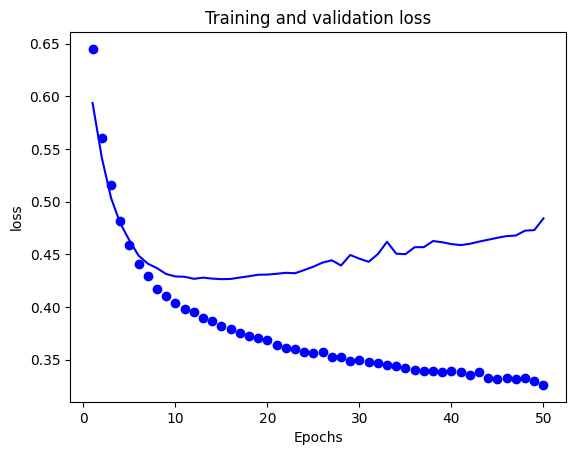

In [512]:
#plot training and validation loss without regularization 
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Traininig loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")


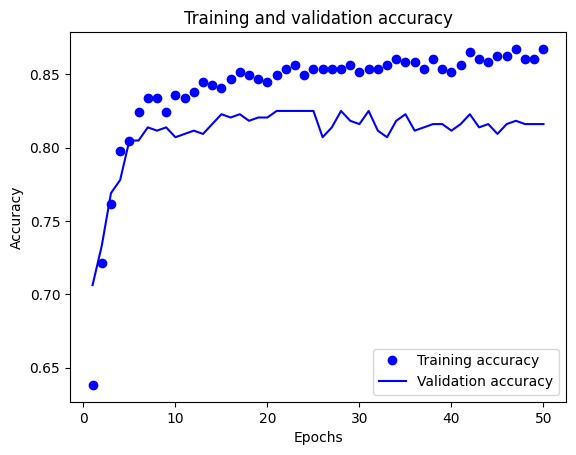

In [513]:
#plot training and validadiation accuracy wiryhout regularization
plt.clf() #clear figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, "bo", label= "Training accuracy")
plt.plot(epochs, val_acc, "b", label= "Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [514]:
validation_accuracy, validation_loss = model.evaluate(X_valid_processed, y_valid)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8161 - loss: 0.4841 


In [515]:
#define the model with L2 regularization
model = keras.Sequential([
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.002), activation = 'relu'),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.002), activation='relu'),
    #layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [516]:
#train the model
history = model.fit(X_train_processed,
                    y_train,
                    epochs = 50,
                    batch_size=32,
                    validation_data=(X_valid_processed, y_valid))


Epoch 1/50


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6787 - loss: 0.7478 - val_accuracy: 0.7399 - val_loss: 0.7141
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7640 - loss: 0.6781 - val_accuracy: 0.7870 - val_loss: 0.6661
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7888 - loss: 0.6359 - val_accuracy: 0.8184 - val_loss: 0.6304
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8135 - loss: 0.6067 - val_accuracy: 0.8161 - val_loss: 0.6060
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8270 - loss: 0.5822 - val_accuracy: 0.8139 - val_loss: 0.5866
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8247 - loss: 0.5647 - val_accuracy: 0.8139 - val_loss: 0.5687
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8315 - loss: 0.5508 - val_accuracy: 0.8117 - val_loss: 0.5571
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8225 - loss: 0.5392 - val_accuracy: 0.8139 - val_loss: 0.5487
Ep

Text(0, 0.5, 'loss')

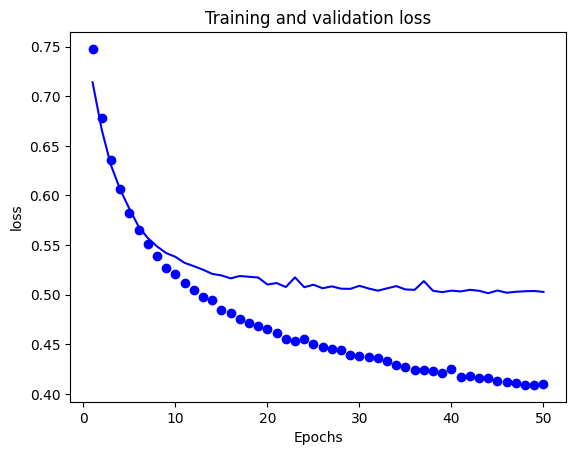

In [517]:
#plot training and validadiation loos with regularization
plt.clf() #clear figure
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Traininig loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")

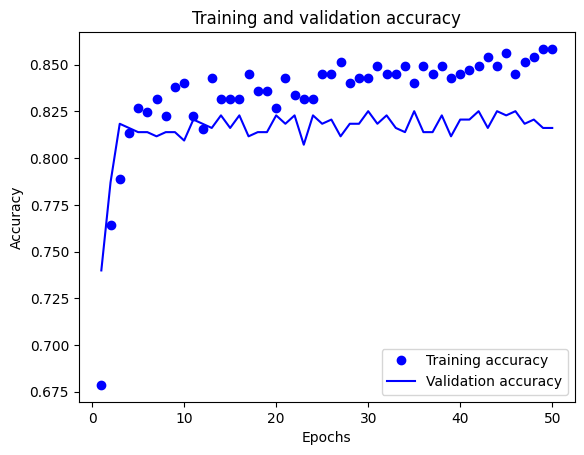

In [518]:
#plot training and validadiation accuracy with regularization
plt.clf() #clear figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, "bo", label= "Training accuracy")
plt.plot(epochs, val_acc, "b", label= "Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [519]:
validation_accuracy, validation_loss = model.evaluate(X_valid_processed, y_valid)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8161 - loss: 0.5027 


In [520]:
#load and preprocess thre test set
test_data = pd.read_csv('test.csv')

#drop irrevelant columns(same as train)
test_data = test_data.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

#Apply same preprocessing as train
X_test_data_processed = preprocessor.transform(test_data)


In [521]:
#print test preprocessed data
print(X_test_data_processed.shape)


(418, 12)


In [522]:
#Make prediction
y_test_pred_proba = model.predict(X_test_data_processed)

#print(y_test_pred_proba[:10])

#Convert probabilities to bnary outcomes
y_test_pred = (y_test_pred_proba > 0.5).astype("int32").flatten()

print(y_test_pred.shape)


 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(418,)


In [524]:
#create submission file

#Reload test.csv with PassengerId
raw_test_data = pd.read_csv('test.csv')

submission = pd.DataFrame({
    "PassengerId": raw_test_data["PassengerId"],
    "Survived": y_test_pred
})

#Save as CSV
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.cvs")

print(submission)

Submission file created: submission.cvs
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
